In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

In [36]:
df = pd.read_csv('/Users/avonleafisher/Desktop/CNHS/CNHS.csv')

In [37]:
df.head()

,Timestamp,Participant Informed Consent,birthyear,race,ethnicity,gender,household,children,education,college,...,post_covid_housing_satisfaction,tenant_rights_workshops,childcare_required,childcare_eldercare_required,care_provider,dif_care_needed,job_lost_care,gatherings,post_covid_public_involvement,other
0,2020/08/27 10:03:59 AM AST,Yes,9-16-64,White/Caucasian,Not of Hispanic or Latino origin;white,Female,NaN,2,"Left High School, have GED",NaN,...,NaN,No,No,No,Before/After School programs on school grounds,No,No,NaN,Yes,NaN
1,2020/08/27 10:41:25 AM AST,Yes,9-16-64,White/Caucasian,Not of Hispanic or Latino origin;white,Female,NaN,2,"Left High School, have GED",NaN,...,NaN,No,No,No,Before/After School programs on school grounds,No,No,NaN,Yes,NaN
2,2020/08/27 10:41:51 AM AST,Yes,9-16-64,White/Caucasian,Not of Hispanic or Latino origin;white,Female,NaN,2,"Left High School, have GED",NaN,...,NaN,No,No,No,Before/After School programs on school grounds,No,No,NaN,Yes,NaN
3,2020/08/27 11:02:27 AM AST,Yes,10-28-51,RD,blank,Female,NaN,blank,blank,NaN,...,blank,NaN,blank,blank,NaN,NaN,blank,NaN,blank,NaN
4,2020/08/28 7:42:51 AM AST,Yes,1987,White/Caucasian,blank,blank,2 adults 4 children,4,College degree(s) complete,Associates degree,...,5,Yes,No,No,Friends or family,No,No,yes - sporting events,blank,NaN


In [38]:
df.columns

Index(['Timestamp', 'Participant Informed Consent', 'birthyear', 'race',
       'ethnicity', 'gender', 'household', 'children', 'education', 'college',
       'residence', 'yrs_at_residence', 'bedrooms', 'bathrooms', 'rent',
       'rent_subsidies', 'gov_benefits', 'services', 'special_needs',
       'handicap_accessibility_needs', 'handicap_accessible',
       'special_needs_met', 'landlord_response', 'health_insurance',
       'insurance_provider', 'cars', 'public_transit',
       'changed_public_transit', 'how_PT_changed', 'PT_services_needed',
       'pre_covid_house_income', 'income_changed_post_covid',
       'unemployment_household', 'denied_unemployment', 'stimcheck',
       'know_why_no_stimcheck', 'sued_by_landlord', 'why_sued_by_landlord',
       'sued_landlord', 'why_sued_landlord', 'tenant_contact',
       'tenant_complaints', 'missed_rent', 'months_missed_rent',
       'fin_situation_discussed', 'details_discussed', 'eviction_threat',
       'eviction_threat_covid', 'plac

In [39]:
df.loc[(df.race == 'Black or African American'),'race']='Black'
df.loc[(df.race == 'White/Caucasian'),'race']='White'
df.loc[(df.race == 'Black or African American;why?'),'race']='Black'
df.loc[(df.race == 'Black or African American;White/Caucasian'),'race']='Black and White'
df.loc[(df.race == 'White/Caucasian;American Indian/Alaska Native'),'race']='White and American Indian/Alaska Native'

In [40]:
race = df.race
race.dropna(inplace=True)
race = race[race != '--']
race = race[race != 'Black or African American;Sub Saharan African;American Indian/Alaska Native']
race = race[race != '--']
race = race[race != 'na']
race = race[race != 'blank']

In [41]:
print(race.unique)

<bound method Series.unique of 0       White
1       White
2       White
3          RD
4       White
       ...   
89      Black
90      Black
91    Bengali
93      Black
94      White
Name: race, Length: 84, dtype: object>


In [42]:
race.replace(to_replace=[i for i in race if len(i) > 12], value="Multiracial", inplace=True)

In [43]:
races = []
for row in race:
    if row not in races:
        races.append(row)

In [44]:
race_freqs = {}
for r in races:
    race_freqs[r] = 0
    for i in race:
        if i == r:
            race_freqs[r] += 1

In [45]:
race_freqs

{'White': 20,
 'RD': 1,
 'Black': 43,
 'Bengali': 9,
 'Multiracial': 8,
 'Muslim': 1,
 'Afrikan': 1,
 'American': 1}

In [46]:
sorted_races = dict(sorted(race_freqs.items(), key=operator.itemgetter(1), reverse=False))

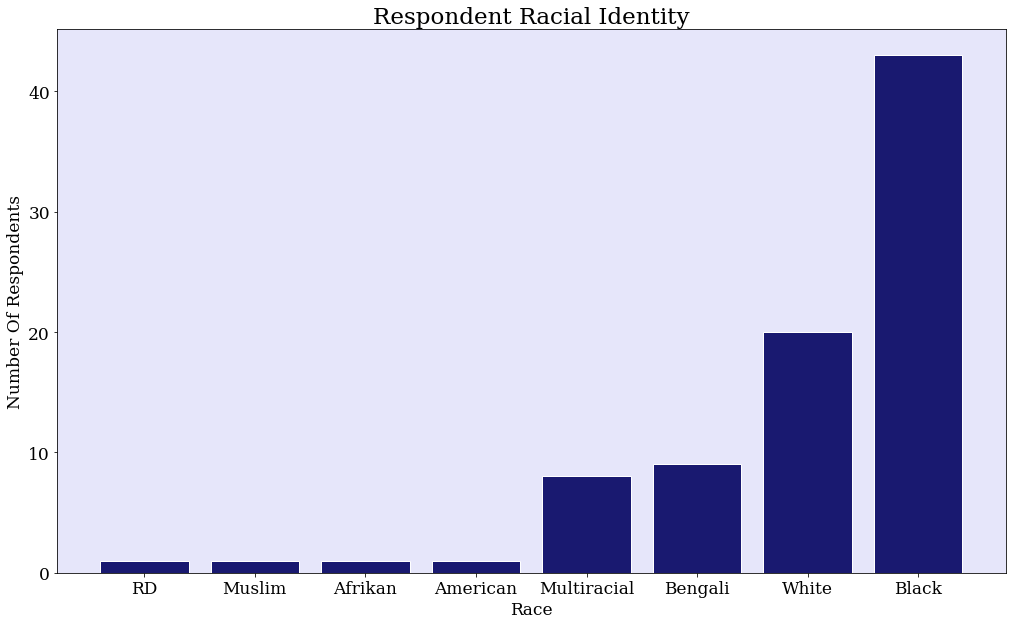

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(sorted_races.keys())
y = list(sorted_races.values())
plt.rcParams['axes.facecolor'] = 'lavender'
plt.figure(figsize = (17,10))

plt.bar(x, y, color = 'midnightblue', edgecolor='1')

plt.xlabel('Race', fontsize=17, fontname='Serif')
plt.ylabel('Number Of Respondents', fontsize=17, fontname='Serif')
plt.xticks(fontsize=17, fontname='Serif')
plt.yticks(fontsize=17, fontname='Serif')
plt.title('Respondent Racial Identity', fontsize=23, fontname='Serif')
plt.show()

In [90]:
df.rent = df.rent[df.rent != "Don't want to say"]
df.rent = df.rent[df.rent != "blank"]
df.rent = df.rent[df.rent != "I have two apts.  #1 85.00  #2 #163.00"]
df.rent = df.rent[df.rent != "na"]
df.rent.dropna(inplace=True)

In [91]:
rent = df.rent
for index, value in rent.items():
    if len(value) > 10:
        rent.drop(index, inplace=True)
        print(f"Index : {index}, Value : {value}")

In [92]:
rent.dropna(inplace=True)
rent = rent[rent != 'none']
rent = rent[rent != '--']
rent = rent[rent != '-']
rent = rent[rent != 'what I can']
rent = rent[rent != 'own it']
rent = rent.replace( '[\$,)]','', regex=True)
rent = pd.to_numeric(rent, downcast="float")

In [93]:
rent_freqs = {'0-200': 0, '201-400': 0, '401-600': 0, '601-800': 0, '801-1000': 0 , '1001-1200': 0, 'Above 1200': 0}

for r in rent:
    type(r) == int
    if 0 < r < 200:
        rent_freqs['0-200'] += 1
    if 201 < r < 400:
        rent_freqs['401-600'] += 1
    if 401 < r < 600:
        rent_freqs['601-800'] += 1
    if 801 < r < 1000:
        rent_freqs['801-1000'] += 1
    if 1000 < r < 1200:
        rent_freqs['1001-1200'] += 1
    if 1200 < r:
        rent_freqs['Above 1200'] += 1

In [94]:
rent_freqs

{'0-200': 13,
 '201-400': 0,
 '401-600': 17,
 '601-800': 12,
 '801-1000': 4,
 '1001-1200': 0,
 'Above 1200': 3}

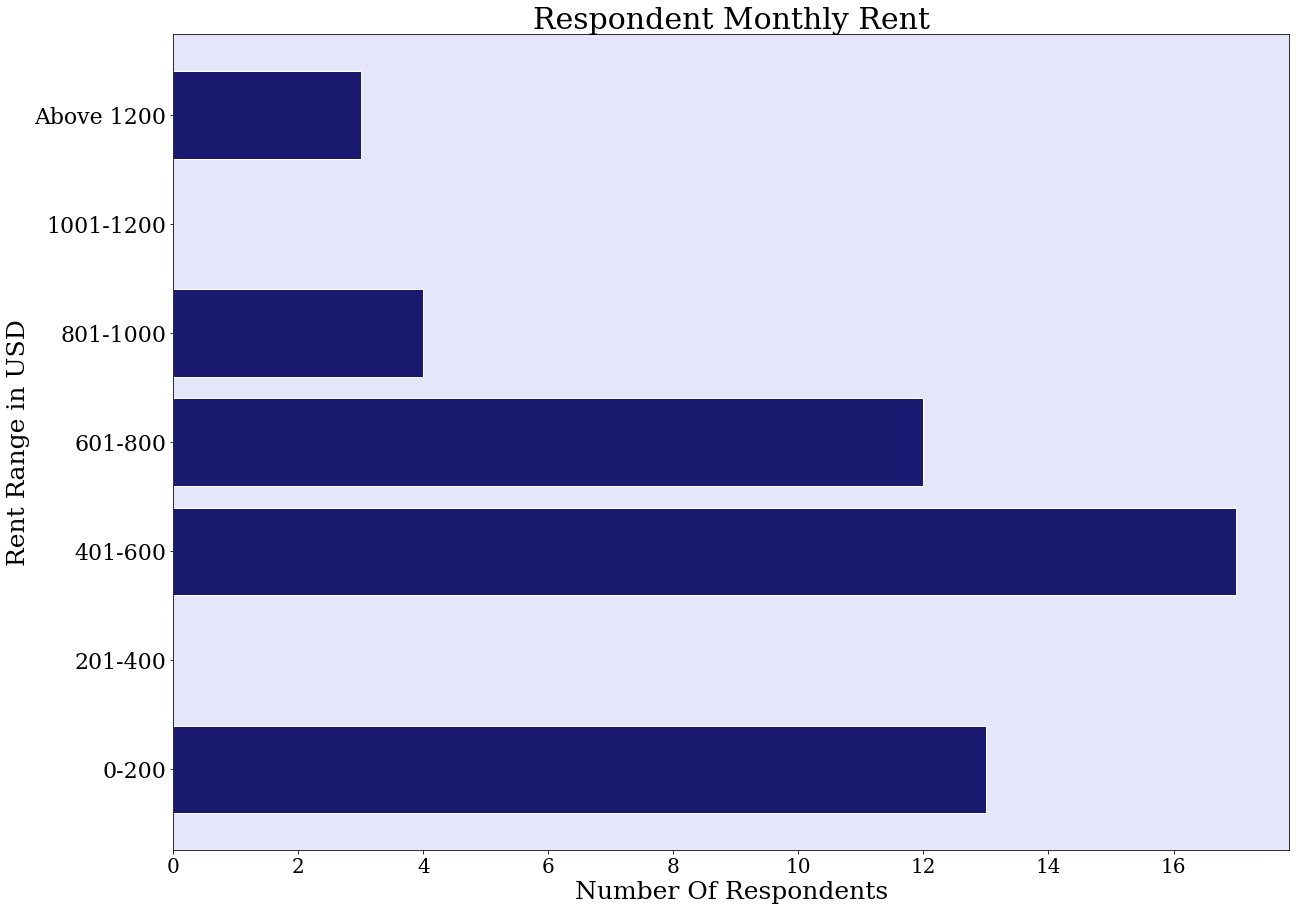

In [95]:
x = list(rent_freqs.keys())
y = list(rent_freqs.values())
plt.rcParams['axes.facecolor'] = 'lavender'
plt.figure(figsize = (20,15))

plt.barh(x, y, color = 'midnightblue', edgecolor='1')

#label the axes, title, and ticks
plt.xlabel('Number Of Respondents', fontsize=25, fontname='Serif')
plt.ylabel('Rent Range in USD', fontsize=25, fontname='Serif')
plt.xticks(fontsize=20, fontname='Serif')
plt.yticks(fontsize=22, fontname='Serif')
plt.title('Respondent Monthly Rent', fontsize=30, fontname='Serif')

#display the plot
plt.show()

In [315]:
rent.describe()

count      65.000000
mean      434.792297
std       342.912628
min         0.000000
25%       198.000000
50%       307.000000
75%       560.000000
max      1350.000000
Name: rent, dtype: float64

In [319]:
ages = pd.Series(ages)

In [320]:
ages.describe()

count    64.000000
mean     50.531250
std      16.848502
min       9.000000
25%      35.000000
50%      50.000000
75%      63.250000
max      85.000000
dtype: float64

In [96]:
affordable_pre = df.rent_affordability
affordable_pre.dropna(inplace=True)
affordable_pre = affordable_pre[affordable_pre != 'blank']
affordable_pre = affordable_pre[affordable_pre != 'BLANK']
affordable_pre = affordable_pre[affordable_pre != 'Good']
affordable_pre = affordable_pre[affordable_pre != 'same as is now']
affordable_pre = affordable_pre[affordable_pre != '"checked"']

In [97]:
affordable_dict_pr = {'1': 0, '2': 0, '3': 0, '4':0, '5':0}
for i in affordable_pre:
    if int(i) == 1:
        affordable_dict_pr['1'] += 1
    if int(i) == 2:
        affordable_dict_pr['2'] += 1
    if int(i) == 3:
        affordable_dict_pr['3'] += 1
    if int(4) == 1:
        affordable_dict_pr['4'] += 1
    if int(5) == 1:
        affordable_dict_pr['5'] += 1

In [98]:
affordable_dict_pr

{'1': 7, '2': 7, '3': 17, '4': 0, '5': 0}

In [99]:
affordable_post = df.future_rent_affordability

In [100]:
affordable_post.dropna(inplace=True)
affordable_post = affordable_post[affordable_post != 'blank']
affordable_post = affordable_post[affordable_post != 'BLANK']

In [101]:
affordable_post_dict = {'1': 0, '2': 0, '3': 0, '4':0, '5':0}
for i in affordable_post:
    if int(i) == 1:
        affordable_post_dict['1'] += 1
    if int(i) == 2:
        affordable_post_dict['2'] += 1
    if int(i) == 3:
        affordable_post_dict['3'] += 1
    if int(4) == 1:
        affordable_post_dict['4'] += 1
    if int(5) == 1:
        affordable_post_dict['5'] += 1

In [102]:
affordable_post_dict

{'1': 10, '2': 4, '3': 15, '4': 0, '5': 0}

Text(0.5, 1.0, 'After')

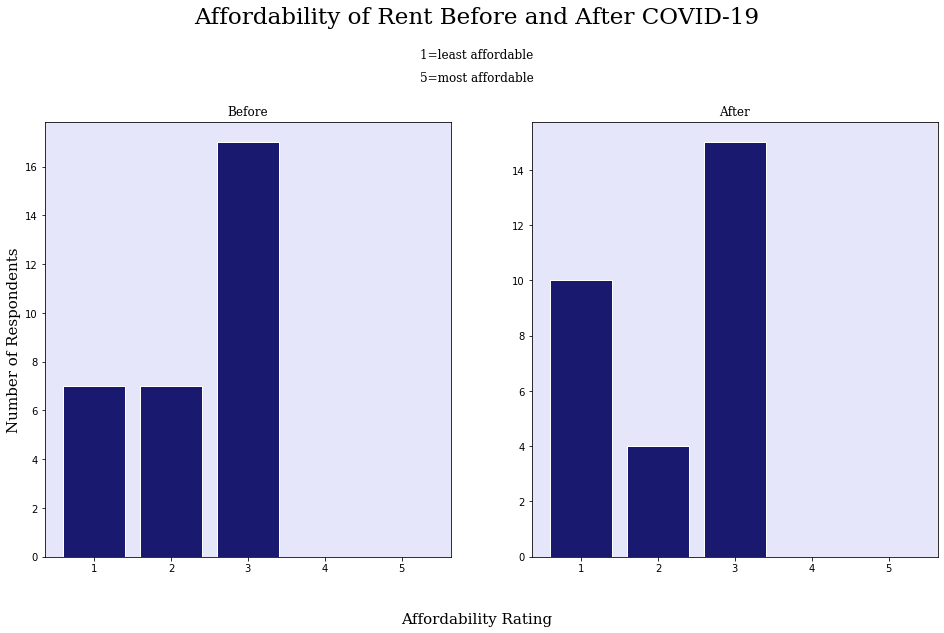

In [312]:
x1 = list(affordable_dict_pr.keys())
y1 = list(affordable_dict_pr.values())

x2 = list(affordable_post_dict.keys())
y2 = list(affordable_post_dict.values())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle('Affordability of Rent Before and After COVID-19', fontname='serif', fontsize=23, y=1.08)
plt.text(x=0.5, y=0.99, s= "1=least affordable", fontsize=12,fontname='serif', ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.95, s= "5=most affordable", fontsize=12,fontname='serif', ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.01, s= "Affordability Rating", fontsize=15,fontname='serif', ha="center", transform=fig.transFigure)

ax1.bar(x1, y1, color = 'midnightblue', edgecolor='1')
ax1.set_title('Before', fontname='serif', fontsize=12)
ax1.set_ylabel('Number of Respondents', fontname='serif', fontsize=15)

ax2.bar(x2, y2, color = 'midnightblue', edgecolor='1')
ax2.set_title('After', fontname='serif', fontsize=12)

In [126]:
hi = df.health_insurance
hi.dropna(inplace=True)
hi = hi[hi != 'blank']
hi = hi[hi != '--']
hi = hi[hi != 'Medical']
hi = hi[hi != 'Medicaid']

In [207]:
sn3 = df.handicap_accessibility_needs

In [212]:
sn3.dropna(inplace=True)
sn3 = sn3[sn3 != 'blank']
sn3 = sn3[sn3 != '--']
sn3 = sn3[sn3 != 'na']
sn3 = sn3[sn3 != 'none']
sn3 = sn3[sn3 != 'no']
sn3 = sn3[sn3 != 'No']
sn3 = sn3[sn3 != 'None']
sn3 = sn3[sn3 != 'nothing']
sn3.value_counts()

ramp                          1
bigger places                 1
higher toilets                1
walker                        1
all                           1
grip bars, wheelchair ramp    1
ramps, low countertops        1
grip bars in bathroom         1
[sic] Reading writing         1
Name: handicap_accessibility_needs, dtype: int64

In [183]:
sn2 = df['handicap_accessible']
sn2.dropna(inplace=True)
sn2 = sn2[sn2 != 'blank']
sn2 = sn2[sn2 != '--']
sn2 = sn2[sn2 != 'na']

In [148]:
sn1 = df.special_needs

In [153]:
sn.dropna(inplace=True)
sn1 = sn1[sn1 != 'blank']
sn1 = sn1[sn1 != '--']
sn1 = sn1[sn1 != 'na']
sn1 = sn1[sn1 != 'ADHD']
sn1 = sn1[sn1 != 'Self, left ankle injury 1997']
sn1 = sn1[sn1 != 'senior citizen']
sn1 = sn1[sn1 != '1 senior citizen']

In [136]:
sn = df.special_needs_met

In [144]:
sn.dropna(inplace=True)
sn = sn[sn != 'blank']
sn = sn[sn != '--']
sn = sn[sn != 'No, I just do what I can']
sn = sn[sn != 'na']
sn = sn[sn != 'no']

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Text(0, 0.5, '')

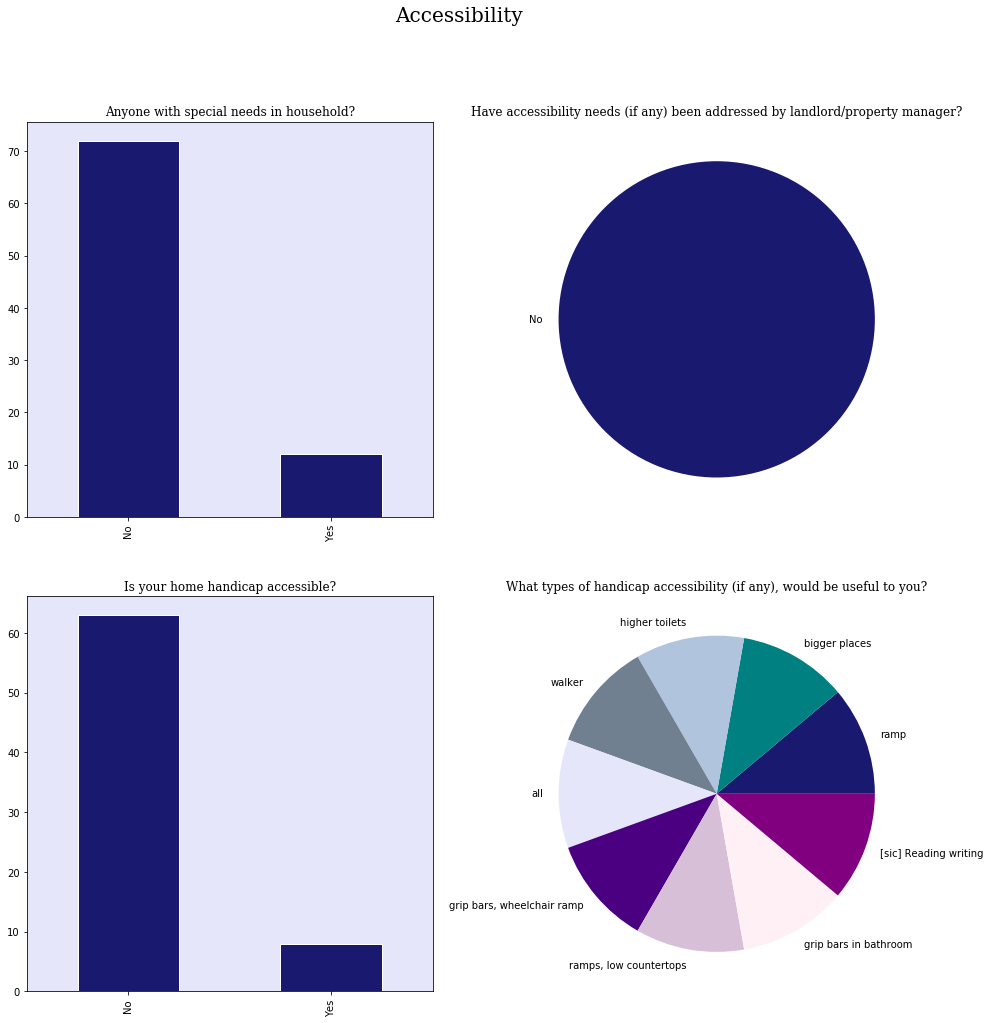

In [246]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Accessibility', fontname='serif', fontsize=20)
axs[0, 1].set_title('Have accessibility needs (if any) been addressed by landlord/property manager?', fontname='serif', fontsize=12)
sn.value_counts().plot(kind='pie', ax=axs[0, 1], colors = ['midnightblue'])
axs[0, 1].set_ylabel('')

axs[0, 0].set_title('Anyone with special needs in household?', fontname='serif', fontsize=12)
sn1.value_counts().plot(kind='bar', ax=axs[0, 0], color = 'midnightblue', edgecolor='1')


axs[1, 0].set_title('Is your home handicap accessible?', fontname='serif', fontsize=12)
sn2.value_counts().plot(kind='bar', ax=axs[1, 0], color = 'midnightblue', edgecolor='1')


axs[1, 0].set_title('Is your home handicap accessible?', fontname='serif', fontsize=12)
sn2.value_counts().plot(kind='bar', ax=axs[1, 0], color = 'midnightblue', edgecolor='1')

axs[1, 1].set_title('What types of handicap accessibility (if any), would be useful to you?', fontname='serif', fontsize=12)
sn3.value_counts().plot(kind='pie', ax=axs[1, 1], colors = ['midnightblue', 'teal', 'lightsteelblue', 'slategray', 'lavender', 'indigo', 'thistle', 'lavenderblush', 'purple'])
axs[1, 1].set_ylabel('')

In [247]:
df.columns

Index(['Timestamp', 'Participant Informed Consent', 'birthyear', 'race',
       'ethnicity', 'gender', 'household', 'children', 'education', 'college',
       'residence', 'yrs_at_residence', 'bedrooms', 'bathrooms', 'rent',
       'rent_subsidies', 'gov_benefits', 'services', 'special_needs',
       'handicap_accessibility_needs', 'handicap_accessible',
       'special_needs_met', 'landlord_response', 'health_insurance',
       'insurance_provider', 'cars', 'public_transit',
       'changed_public_transit', 'how_PT_changed', 'PT_services_needed',
       'pre_covid_house_income', 'income_changed_post_covid',
       'unemployment_household', 'denied_unemployment', 'stimcheck',
       'know_why_no_stimcheck', 'sued_by_landlord', 'why_sued_by_landlord',
       'sued_landlord', 'why_sued_landlord', 'tenant_contact',
       'tenant_complaints', 'missed_rent', 'months_missed_rent',
       'fin_situation_discussed', 'details_discussed', 'eviction_threat',
       'eviction_threat_covid', 'plac

In [250]:
by = df.birthyear

In [255]:
by.dropna(inplace=True)
by = by[by != 'blank']
by = by[by != '--']

In [260]:
def calc_age(year):
    if type(year) == int:
        age = 2020 - year
        return age

In [268]:
by[0] = 1964

In [270]:
by[1] = 1964

In [273]:
by[3] = 1951

In [285]:
ages = []
for i in by:
    if len(str(i)) == 4:
        ages.append(2020-int(i))

In [307]:
ages_dict = {'18 or under': 0, '19-29': 0, '30-39': 0, '40-49': 0, '50-59':0, '60-69':0, '70-79':0, '80 or above':0 }
for i in ages:
    if i <= 18:
        ages_dict['18 or under'] += 1
    if 18 < i < 30:
        ages_dict['19-29'] += 1
    if 30 <= i < 39:
        ages_dict['30-39'] += 1
    if 40 <= i < 49:
        ages_dict['40-49'] += 1
    if 50 <= i < 59:
        ages_dict['50-59'] += 1
    if 60 <= i < 69:
        ages_dict['60-69'] += 1
    if 70 <= i < 79:
        ages_dict['70-79'] += 1
    if i >= 80:
        ages_dict['80 or above'] += 1

In [308]:
ages_dict

{'18 or under': 1,
 '19-29': 4,
 '30-39': 13,
 '40-49': 8,
 '50-59': 14,
 '60-69': 10,
 '70-79': 4,
 '80 or above': 5}

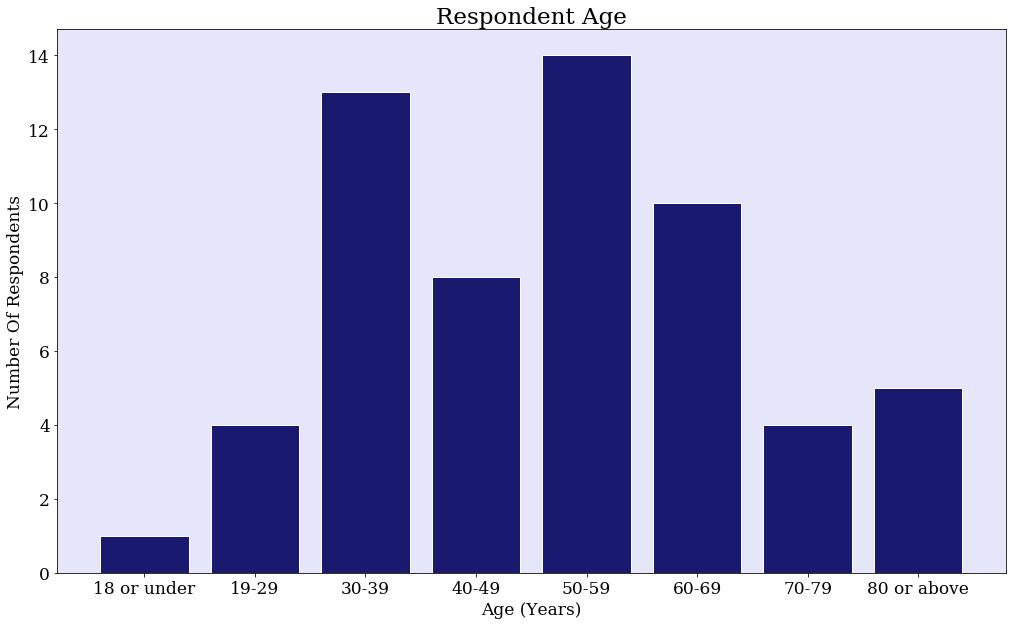

In [311]:
x = list(ages_dict.keys())
y = list(ages_dict.values())
plt.rcParams['axes.facecolor'] = 'lavender'
plt.figure(figsize = (17,10))

plt.bar(x, y, color = 'midnightblue', edgecolor='1')

plt.xlabel('Age (Years)', fontsize=17, fontname='Serif')
plt.ylabel('Number Of Respondents', fontsize=17, fontname='Serif')
plt.xticks(fontsize=17, fontname='Serif')
plt.yticks(fontsize=17, fontname='Serif')
plt.title('Respondent Age', fontsize=23, fontname='Serif')
plt.show()